# Morgage Delinquent Prediction
The goal of data analytics is to determine trends and pattrens to support strategic decisionsin a variety of situations. Mortgage deliquency is a common problem in the real world. The design of mortgage deliquency predicition is a challenging task with the real-world dataset because of confidentiality and the highly imbalanced available dataset. Hence, in the analysis, we apply three machine learning algorithms to detect whether a mortgage is deliquent or not using a real world datase. Furthermore, finding the most important variables that may lead to a stronger impact in the prediciton. Additionally, compare and discuss the performance of the machine learning algorithms used for the classification.

### Understanding the Business Problem
Before we dive into solve the problem, let us first understand the business related to this dataset. The objective is to predict customers that will deliquent in the coming month. 

## Import Libraries

In [73]:
# visualisation package
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import shap

# data analysis packages
import pandas as pd 
import numpy as np 

# model interpretation package 
from sklearn.inspection import partial_dependence, permutation_importance, plot_partial_dependence

# machine learning package
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, ConfusionMatrixDisplay, auc
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

## Merge multiple csv into single file

In [2]:
mortage_data = pd.concat(map(pd.read_csv, ["data01.csv", "data02.csv", "data03.csv", "data04.csv"]), ignore_index=True)
mortage_data

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue
0,2162571.0,353223,13,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.45459
1,2162571.0,353223,14,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.45459
2,2162571.0,353223,19,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.45459
3,2162571.0,353223,23,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.45459
4,2162571.0,353223,28,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.45459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415224,2176861.0,355607,16,5.55,NaN,136500.0,864.0,NaN,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2009-10-31,27,123641.300000,0.993521,109903.40000
415225,2176861.0,355607,35,5.55,NaN,136500.0,864.0,NaN,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2011-05-31,29,123641.300000,0.969442,109903.40000
415226,2176861.0,355607,43,5.55,NaN,136500.0,864.0,NaN,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2012-01-31,30,123641.300000,0.956507,109903.40000
415227,2176862.0,355607,2,5.35,NaN,2600.0,864.0,NaN,139100.0,35213.74,2600.0,2038-07-01,2008-06-20,ZL,2008-08-31,26,2355.072000,1.017605,2093.39800


In [3]:
# quick inspection
mortage_data[mortage_data["NumberMonthsInArrears"].notnull()]

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue
30,2.176181e+06,355491,26,5.4,0.0,137580.0,849.0,0.00,140000.0,49685.00,137580.0,2038-08-01,2008-07-07,GL,2010-09-30,34,122839.285714,0.940228,110559.305689
31,2.176182e+06,355491,22,5.2,0.0,2420.0,849.0,0.00,140000.0,49685.00,2420.0,2038-08-01,2008-07-07,GL,2010-05-31,34,2160.714286,0.942920,1944.712311
32,2.176182e+06,355491,31,5.2,0.0,2420.0,849.0,0.00,140000.0,49685.00,2420.0,2038-08-01,2008-07-07,GL,2011-02-28,34,2160.714286,0.932091,1944.712311
33,2.176182e+06,355491,34,5.2,0.0,2420.0,849.0,0.00,140000.0,49685.00,2420.0,2038-08-01,2008-07-07,GL,2011-05-31,35,2160.714286,0.920296,1944.712311
83,1.187314e+09,2975494,31,5.2,1.0,155000.0,3106.0,1219.97,275000.0,62556.27,155000.0,2039-09-01,2009-08-25,NH,2012-02-29,39,138096.935139,0.935567,121750.058911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415216,2.176181e+06,355491,40,5.4,0.0,137580.0,849.0,0.00,140000.0,49685.00,137580.0,2038-08-01,2008-07-07,GL,2011-11-30,35,122839.300000,0.894926,110559.300000
415217,2.176182e+06,355491,5,5.2,0.0,2420.0,810.0,0.00,140000.0,48868.08,2420.0,2038-08-01,2008-07-07,GL,2008-12-31,32,2160.714000,0.991853,1944.712000
415218,2.176182e+06,355491,8,5.2,0.0,2420.0,849.0,0.00,140000.0,49685.00,2420.0,2038-08-01,2008-07-07,GL,2009-03-31,32,2160.714000,0.972813,1944.712000
415219,2.176182e+06,355491,24,5.2,0.0,2420.0,849.0,0.00,140000.0,49685.00,2420.0,2038-08-01,2008-07-07,GL,2010-07-31,34,2160.714000,0.953841,1944.712000


In [4]:
mortage_data.loc[:6, ["InterestRate","LoanAge"]]

,InterestRate,LoanAge
0,5.55,13
1,5.55,14
2,5.55,19
3,5.55,23
4,5.55,28
5,5.55,35
6,5.60,29


In [5]:
# inspect the first 20 observations
mortage_data.head(10) 


,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue
0,2162571.0,353223,13,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.454590
1,2162571.0,353223,14,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.454590
2,2162571.0,353223,19,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.454590
3,2162571.0,353223,23,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.454590
4,2162571.0,353223,28,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.454590
5,2162571.0,353223,35,5.55,NaN,110000.0,907.0,NaN,110000.0,33057.28,110000.0,2038-07-01,2008-06-11,NH,2011-05-31,31,150006.818492,0.934021,135002.454590
6,2163722.0,353406,29,5.60,NaN,12000.0,624.0,NaN,209000.0,38515.91,12000.0,2038-07-01,2008-06-13,GL,2010-11-30,30,10737.294202,0.938371,9646.302251
7,2163722.0,353406,31,5.60,NaN,12000.0,688.0,NaN,209000.0,40061.70,12000.0,2038-07-01,2008-06-13,GL,2011-01-31,31,10737.294202,0.942009,9646.302251
8,2170131.0,354477,10,5.80,NaN,183700.0,-75.0,NaN,183700.0,37423.72,183700.0,2038-07-01,2008-06-23,GL,2009-04-30,26,167502.507523,0.978236,149995.917368
9,2170131.0,354477,14,5.80,NaN,183700.0,-75.0,NaN,183700.0,37423.72,183700.0,2038-07-01,2008-06-23,GL,2009-08-31,27,167502.507523,0.952906,149995.917368


In [6]:
max(mortage_data["ConsumerAge"])

82

## Exploratory Data Analysis
The goal is to analyze our data to find patterns and correlations as well as calculate statistics that will enable us better understand our data

### Data Structure
In this dataset, we have variables of three different data types. These includes float, int, and object. Below is a peek of how it is structured.

* DebtID: Unique identity of a loan part
* ConsumerID: Unique identity of a consumer
* LoanAge: Loan age in months
* InterestRate: fixed interest rate in percentage
* NumberMonthsInArrears: Number of months a consumer payment is in arrears
* CurrentBalance: Current principal amount
* EstDisposableIncome: Estimates disposable income of the consumer
* ArrearsBalance: The amount in arrears as of the reporting date
* TotalExposure: Total mortgage amount including all mortgage parts
* IndexedTotalIncome: consumer income indexed to latest income index
* Original Balance: Mortgage principal amount at the time of origination
* LoanOriginationDate: Mortgage origination date
* MaturityDate: Mortgage maturity date
* ReportDate: Reporting date
* ConsumerAge: Age of consumer in years
* PropertyRegion: Region in which the property is located
* OriginalPropertyValue: Property value at mortgage origination assigned to a loan part. The total value of a property is the sum of property values of all loan parts
* ForeclosureValue: Foreclosure value of property after factoring in costs
* PropertyIndexFactor: Property value index factor applicable to both property value and foreclosure value.


In [7]:
# the structure of the data
mortage_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415229 entries, 0 to 415228
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DebtID                 415229 non-null  float64
 1   ConsumerID             415229 non-null  int64  
 2   LoanAge                415229 non-null  int64  
 3   InterestRate           415229 non-null  float64
 4   NumberMonthsInArrears  10472 non-null   float64
 5   CurrentBalance         415229 non-null  float64
 6   EstDisposableIncome    412171 non-null  float64
 7   ArrearsBalance         10472 non-null   float64
 8   TotalExposure          415229 non-null  float64
 9   IndexedTotalIncome     372996 non-null  float64
 10  OriginalBalance        415229 non-null  float64
 11  MaturityDate           415229 non-null  object 
 12  LoanOriginationDate    415229 non-null  object 
 13  PropertyRegion         413362 non-null  object 
 14  ReportDate             415229 non-nu

### Data distribution
This shows the statistical summary of our dataset.

In [8]:
# data description
mortage_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DebtID,415229.0,9.417675e+08,1.949740e+08,2.159011e+06,7.937401e+08,9.125101e+08,1.111126e+09,1.288829e+09
ConsumerID,415229.0,2.405515e+06,4.787204e+05,1.291600e+04,2.127630e+06,2.359230e+06,2.809862e+06,3.171655e+06
LoanAge,415229.0,3.550061e+01,2.351513e+01,0.000000e+00,1.600000e+01,3.200000e+01,5.200000e+01,1.230000e+02
InterestRate,415229.0,4.544582e+00,6.262342e-01,2.700000e+00,4.050000e+00,4.600000e+00,5.000000e+00,7.350000e+00
NumberMonthsInArrears,10472.0,2.637911e+00,2.902111e+01,-4.617000e+02,8.000000e-01,1.000000e+00,1.300000e+00,1.758700e+03
CurrentBalance,415229.0,1.017696e+05,7.666185e+04,0.000000e+00,5.600000e+04,9.316800e+04,1.300000e+05,1.400000e+06
EstDisposableIncome,412171.0,1.180751e+03,1.358385e+03,-1.816800e+04,2.220000e+02,1.110000e+03,1.855000e+03,1.419300e+04
ArrearsBalance,10472.0,2.279845e+03,7.272322e+03,0.000000e+00,4.407375e+02,7.966800e+02,1.357040e+03,1.242306e+05
TotalExposure,415229.0,2.529903e+05,1.224091e+05,0.000000e+00,1.779910e+05,2.300000e+05,2.930000e+05,1.833800e+06
IndexedTotalIncome,372996.0,4.454705e+04,2.324699e+04,0.000000e+00,3.113561e+04,3.933931e+04,5.229290e+04,4.087458e+05


In [9]:
# check for missing data
mortage_data.isna().sum()

DebtID                        0
ConsumerID                    0
LoanAge                       0
InterestRate                  0
NumberMonthsInArrears    404757
CurrentBalance                0
EstDisposableIncome        3058
ArrearsBalance           404757
TotalExposure                 0
IndexedTotalIncome        42233
OriginalBalance               0
MaturityDate                  0
LoanOriginationDate           0
PropertyRegion             1867
ReportDate                    0
ConsumerAge                   0
OriginalPropertyValue         0
PropertyIndexFactor        2900
ForeclosureValue           2900
dtype: int64

### Handling missing values 
The mean imputation is preferred for dealing with variables that have missing records. For simplicity, the mean of each variable is computed and the missing values for each variable are imputed by this mean. There are missing values in the categorical variables, meaning I will use mode to impute the missing data.

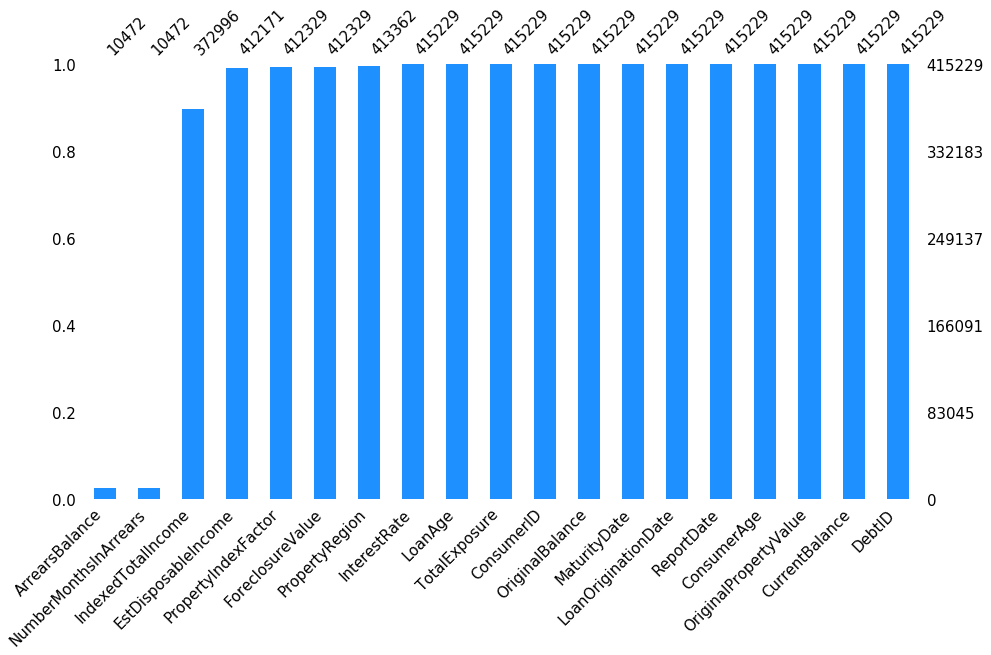

In [10]:
msn.bar(mortage_data,sort="ascending",figsize=(15,8), fontsize=15, color="dodgerblue")

We have about 7 variables with missing data. As we move down the analysis, we will decide what to do with them.

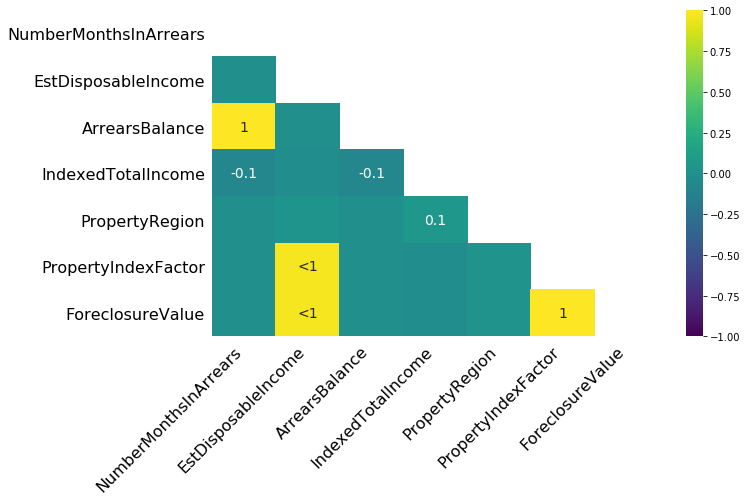

In [11]:
msn.heatmap(mortage_data, figsize=(10,6), cmap="viridis")

Text(0.5, 0.98, 'Visualising the missing values')

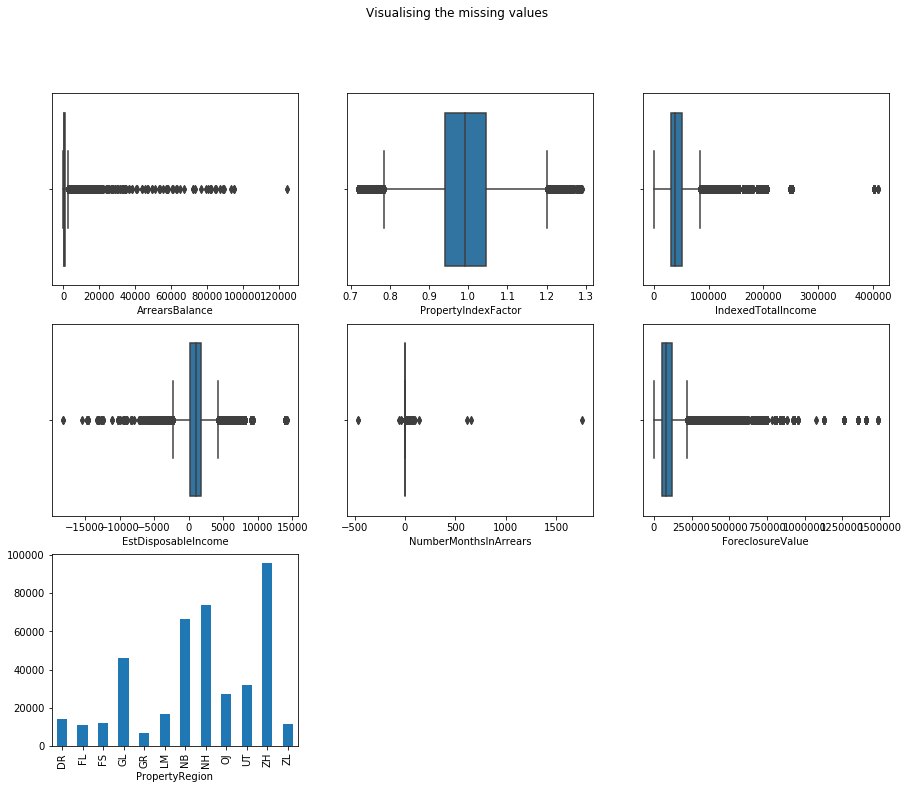

In [12]:
fig = plt.figure(figsize=(15,12))

ax1 = fig.add_subplot(331)
sns.boxplot(mortage_data["ArrearsBalance"], ax=ax1)
ax2 = fig.add_subplot(332)
sns.boxplot(mortage_data.PropertyIndexFactor, ax=ax2)
ax3 = fig.add_subplot(333)
sns.boxplot(mortage_data.IndexedTotalIncome, ax=ax3)
ax4 = fig.add_subplot(334)
sns.boxplot(mortage_data.EstDisposableIncome, ax=ax4)
ax5 = fig.add_subplot(335)
sns.boxplot(mortage_data.NumberMonthsInArrears, ax=ax5)
ax6 = fig.add_subplot(336)
sns.boxplot(mortage_data.ForeclosureValue, ax=ax6)
ax7 = fig.add_subplot(337)
property = mortage_data.groupby("PropertyRegion").size()
property.plot.bar(ax=ax7)

#add overall title and adjust it so that it doesn't overlap with subplot titles
fig.suptitle("Visualising the missing values")

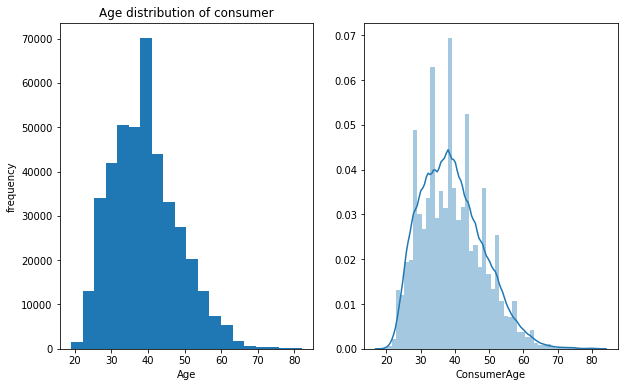

In [13]:
fig = plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist("ConsumerAge", bins=20,data=mortage_data)
plt.title("Age distribution of consumer")
plt.xlabel("Age")
plt.ylabel("frequency")

plt.subplot(1,2,2)
sns.distplot(mortage_data.ConsumerAge,kde=True)

plt.show()

The idea of the plots above is to go through the variables with missing values and find out the best way to handle them appropriately.

## Feature Engineering 

In [14]:
# derive the target variable 
mortage_data["delinquent"] = [0 if x > 0 else 1 for x in mortage_data["NumberMonthsInArrears"]]

# inspect the data after manipulating 
mortage_data

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue,delinquent
0,2162571.0,353223,13,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.45459,1
1,2162571.0,353223,14,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.45459,1
2,2162571.0,353223,19,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.45459,1
3,2162571.0,353223,23,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.45459,1
4,2162571.0,353223,28,5.55,NaN,110000.0,389.0,NaN,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.45459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415224,2176861.0,355607,16,5.55,NaN,136500.0,864.0,NaN,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2009-10-31,27,123641.300000,0.993521,109903.40000,1
415225,2176861.0,355607,35,5.55,NaN,136500.0,864.0,NaN,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2011-05-31,29,123641.300000,0.969442,109903.40000,1
415226,2176861.0,355607,43,5.55,NaN,136500.0,864.0,NaN,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2012-01-31,30,123641.300000,0.956507,109903.40000,1
415227,2176862.0,355607,2,5.35,NaN,2600.0,864.0,NaN,139100.0,35213.74,2600.0,2038-07-01,2008-06-20,ZL,2008-08-31,26,2355.072000,1.017605,2093.39800,1


In [15]:
mortage_data[mortage_data["PropertyRegion"].isnull()]

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue,delinquent
63,1.150543e+09,1787165,19,4.20,NaN,406000.0,1246.0,NaN,553000.0,55510.09,406000.0,2036-07-01,2008-11-06,NaN,2010-05-31,41,451311.694086,0.948345,451311.694086,1
159,6.649301e+08,1881991,29,4.95,NaN,145500.0,1411.0,NaN,387000.0,NaN,145500.0,2034-08-01,2004-07-26,NaN,2006-11-30,37,13.085072,1.000000,11.600247,1
200,6.550111e+08,1860376,31,4.55,NaN,71500.0,2015.0,NaN,146500.0,NaN,71500.0,2034-06-01,2004-05-27,NaN,2006-11-30,39,6.430122,1.000000,5.700465,1
661,1.237193e+09,3081582,20,4.55,NaN,200000.0,1649.0,NaN,200000.0,50915.85,200000.0,2040-11-01,2010-10-27,NaN,2012-05-31,48,2627.195679,1.010132,2634.011943,1
753,1.221081e+09,3045236,20,4.50,NaN,108000.0,1265.0,NaN,264821.0,43631.41,108000.0,2040-12-01,2010-11-16,NaN,2012-06-30,36,1515.217413,0.944936,1518.666948,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414011,6.955721e+08,1385565,24,4.25,NaN,204500.0,1712.0,NaN,304500.0,NaN,204500.0,2035-01-01,2004-12-24,NaN,2006-11-30,56,18.391050,1.000000,16.304130,1
414201,1.149057e+09,2901045,11,5.40,NaN,45378.0,1188.0,NaN,110000.0,31835.95,45378.0,2028-09-01,2008-08-27,NaN,2009-06-30,42,74256.260000,0.950684,66830.630000,1
414275,1.049812e+09,2702032,1,6.10,NaN,0.0,NaN,NaN,0.0,46384.99,58000.0,2009-10-01,2007-09-04,NaN,2007-09-30,43,273.677100,NaN,NaN,1
414341,7.004991e+08,1958099,25,3.85,NaN,101850.0,2367.0,NaN,183100.0,NaN,101850.0,2034-12-01,2004-11-01,NaN,2006-11-30,31,9.159551,1.000000,8.120173,1


### Imputating the missing values 

In [16]:
# get the mean and mode for imputation
numberMean = mortage_data["NumberMonthsInArrears"].mean()
balanceMean = mortage_data["ArrearsBalance"].mean()
incomeMean = mortage_data["EstDisposableIncome"].mean()
properyMean = mortage_data["PropertyIndexFactor"].mean()
regionMean = mortage_data["PropertyRegion"].mode()
foreclosureMean = mortage_data["ForeclosureValue"].mean()
totalIncomeMean = mortage_data["IndexedTotalIncome"].mean()

# fill the null values using the mean and mode
mortgageData = mortage_data.replace(
          {
          'NumberMonthsInArrears':{np.nan:numberMean},
          'ArrearsBalance':{np.nan:balanceMean},
          'EstDisposableIncome':{np.nan:incomeMean},
          'PropertyIndexFactor':{np.nan:properyMean},
          'PropertyRegion':{np.nan:regionMean},
          'ForeclosureValue':{np.nan:foreclosureMean},
          'IndexedTotalIncome':{np.nan:totalIncomeMean}
          })


mortgageData

#
# categoricalColumns = mortage_data.select_dtypes(include=["object"]).columns.tolist()
# numericalColumns = mortage_data.select_dtypes(include=["int64","float64"]).columns.tolist()
#replace the NaN with mean
#for column in mortage_data:
#    if mortage_data[column].isnull().any():
#        if column in categoricalColumns:
#           mortage_data[column] = mortage_data.fillna(mortage_data[column].mode())
#     else:
#           mortage_data[column] = mortage_data.fillna(mortage_data[column].mean())
            

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue,delinquent
0,2162571.0,353223,13,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.45459,1
1,2162571.0,353223,14,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.45459,1
2,2162571.0,353223,19,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.45459,1
3,2162571.0,353223,23,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.45459,1
4,2162571.0,353223,28,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.45459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415224,2176861.0,355607,16,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2009-10-31,27,123641.300000,0.993521,109903.40000,1
415225,2176861.0,355607,35,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2011-05-31,29,123641.300000,0.969442,109903.40000,1
415226,2176861.0,355607,43,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2012-01-31,30,123641.300000,0.956507,109903.40000,1
415227,2176862.0,355607,2,5.35,2.637911,2600.0,864.0,2279.844846,139100.0,35213.74,2600.0,2038-07-01,2008-06-20,ZL,2008-08-31,26,2355.072000,1.017605,2093.39800,1


In [17]:
#review the code after handling the missing data
mortgageData

,DebtID,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,OriginalBalance,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,ForeclosureValue,delinquent
0,2162571.0,353223,13,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-07-31,29,150006.818492,0.958562,135002.45459,1
1,2162571.0,353223,14,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2009-08-31,29,150006.818492,0.945827,135002.45459,1
2,2162571.0,353223,19,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-01-31,30,150006.818492,0.928933,135002.45459,1
3,2162571.0,353223,23,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-05-31,30,150006.818492,0.939887,135002.45459,1
4,2162571.0,353223,28,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,110000.0,2038-07-01,2008-06-11,NH,2010-10-31,30,150006.818492,0.940731,135002.45459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415224,2176861.0,355607,16,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2009-10-31,27,123641.300000,0.993521,109903.40000,1
415225,2176861.0,355607,35,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2011-05-31,29,123641.300000,0.969442,109903.40000,1
415226,2176861.0,355607,43,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,136500.0,2038-07-01,2008-06-20,ZL,2012-01-31,30,123641.300000,0.956507,109903.40000,1
415227,2176862.0,355607,2,5.35,2.637911,2600.0,864.0,2279.844846,139100.0,35213.74,2600.0,2038-07-01,2008-06-20,ZL,2008-08-31,26,2355.072000,1.017605,2093.39800,1


In [18]:
mortgageData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415229 entries, 0 to 415228
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DebtID                 415229 non-null  float64
 1   ConsumerID             415229 non-null  int64  
 2   LoanAge                415229 non-null  int64  
 3   InterestRate           415229 non-null  float64
 4   NumberMonthsInArrears  415229 non-null  float64
 5   CurrentBalance         415229 non-null  float64
 6   EstDisposableIncome    415229 non-null  float64
 7   ArrearsBalance         415229 non-null  float64
 8   TotalExposure          415229 non-null  float64
 9   IndexedTotalIncome     415229 non-null  float64
 10  OriginalBalance        415229 non-null  float64
 11  MaturityDate           415229 non-null  object 
 12  LoanOriginationDate    415229 non-null  object 
 13  PropertyRegion         415229 non-null  object 
 14  ReportDate             415229 non-nu

In [19]:
# view all the date variables
date = mortgageData.select_dtypes(include=["object"])
date

,MaturityDate,LoanOriginationDate,PropertyRegion,ReportDate
0,2038-07-01,2008-06-11,NH,2009-07-31
1,2038-07-01,2008-06-11,NH,2009-08-31
2,2038-07-01,2008-06-11,NH,2010-01-31
3,2038-07-01,2008-06-11,NH,2010-05-31
4,2038-07-01,2008-06-11,NH,2010-10-31
...,...,...,...,...
415224,2038-07-01,2008-06-20,ZL,2009-10-31
415225,2038-07-01,2008-06-20,ZL,2011-05-31
415226,2038-07-01,2008-06-20,ZL,2012-01-31
415227,2038-07-01,2008-06-20,ZL,2008-08-31


### Quick Analysis

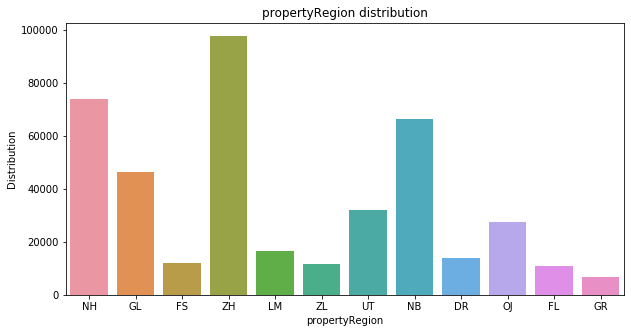

In [20]:
propertyRegion = mortgageData["PropertyRegion"].value_counts()
# propertyRegion
plt.figure(figsize=(10,5))
ax = sns.countplot("PropertyRegion",data=mortgageData)
ax.set(xlabel='propertyRegion', ylabel='Distribution', title="propertyRegion distribution")
plt.show()

The plot above explains 12 regions where customers mortgage are located. ZH happens to be most common region where customers houses are located.

### Target variable

In [21]:
# view data after creating the target variable
target = mortgageData["delinquent"].value_counts()
target

1    406125
0      9104
Name: delinquent, dtype: int64

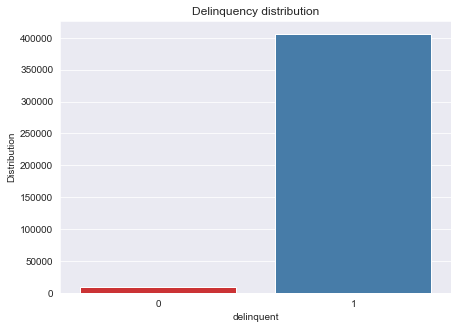

In [22]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
label = ["delinquent", "non-delinquent"]
ax = sns.countplot("delinquent",data=mortage_data,palette="Set1",)
ax.set(xlabel='delinquent', ylabel='Distribution', title="Delinquency distribution")
plt.show()

In the above plot, we have seen the negative class is coming 95% percent cases whereas the positive class is coming only 5% of the time. Therefore, this is an imbalanced dataset. Without building any machine learning model if we predict all the target classes as negative. What do you think our model accuracy could be? our model accuracy would be 95% or more

### Correlation Analysis

A statistical approach to estimate the relationship between two or numerical variables. This is just checking how the variables are correlated with each other.

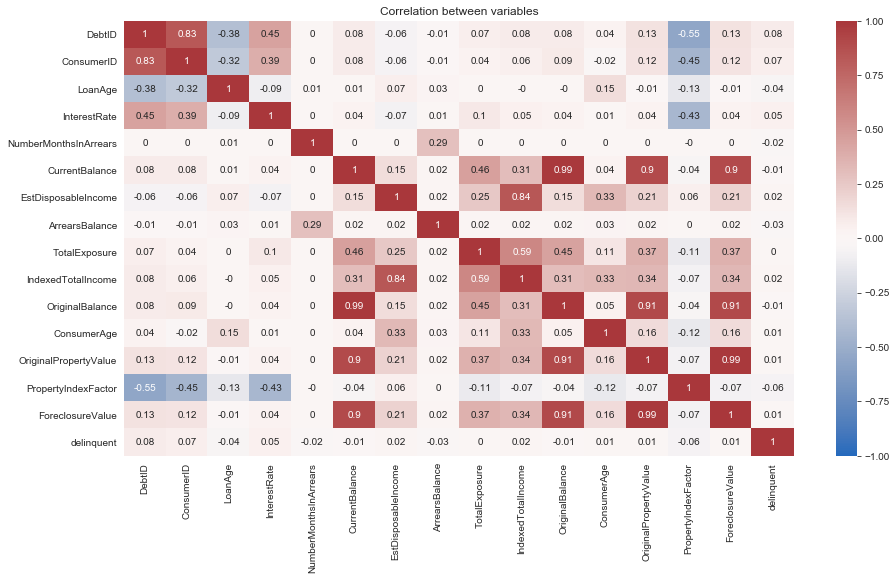

In [23]:
plt.figure(figsize=(15,8))
corrMatrix = mortgageData.corr(method="pearson").round(2)
sns.heatmap(corrMatrix,annot=True, cmap="vlag",vmin=-1,vmax=1,center=0)
plt.title("Correlation between variables")
plt.show()

We can infer from the plot above that there were few variables that correlated with each other. On the other hand, there exist some variables that show no relationship. The correlation analysis shows that the some of the variables are correlated with each other. For example, OriginalBalance is highly correlated with OriginalPropertyValue. Hence, we will have to drop one of them as not to impact negatively to the model. They have high positive correlation between them (0.91).

## Preparing data for model training

In [24]:
# exclude some features from the feature list for model training 
removeFeatures = ["ForeclosureValue", "OriginalBalance", "DebtID", "PropertyRegion", "ReportDate", "MaturityDate","LoanOriginationDate"]

# Define the numerical and categorical features  
numericalColumns = mortgageData.select_dtypes(include=["int64", "float64"]).columns.tolist()
categoricalColumns = mortgageData.select_dtypes(include=["object"]).columns.tolist()

numericalFeatures = [col for col in numericalColumns if col not in removeFeatures] 
categoricalFeatures = [col for col in categoricalColumns if col not in removeFeatures]

# define the final features list
features = numericalFeatures + categoricalFeatures

# define the final data for training and testing
mortgageData = mortgageData[features]


In [25]:
# inspecting the data after dropping off some features
mortgageData

,ConsumerID,LoanAge,InterestRate,NumberMonthsInArrears,CurrentBalance,EstDisposableIncome,ArrearsBalance,TotalExposure,IndexedTotalIncome,ConsumerAge,OriginalPropertyValue,PropertyIndexFactor,delinquent
0,353223,13,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,29,150006.818492,0.958562,1
1,353223,14,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,29,150006.818492,0.945827,1
2,353223,19,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,30,150006.818492,0.928933,1
3,353223,23,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,30,150006.818492,0.939887,1
4,353223,28,5.55,2.637911,110000.0,389.0,2279.844846,110000.0,31781.76,30,150006.818492,0.940731,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415224,355607,16,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,27,123641.300000,0.993521,1
415225,355607,35,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,29,123641.300000,0.969442,1
415226,355607,43,5.55,2.637911,136500.0,864.0,2279.844846,139100.0,35213.74,30,123641.300000,0.956507,1
415227,355607,2,5.35,2.637911,2600.0,864.0,2279.844846,139100.0,35213.74,26,2355.072000,1.017605,1


In [41]:
# dropping some unneccessary data
#categorical_cols = [col for col in mortage_data.columns if mortgageData[col].dtype=='O']
# mortgageData.drop(categorical_cols,inplace=True,axis=1)

### Split Data

In [26]:
# Defining the model features and response variable
feature, response = mortgageData.iloc[:,:-1], mortgageData.iloc[:,-1]

In [27]:
# splitting data into training and testing set
featureTrain, featureTest, responseTrain, responsTest = train_test_split(feature, response, test_size=0.2, random_state=10)

## XGBoost model training

In [28]:
# xgboost model
xgModel = xgb.XGBClassifier(booster="gbtree", objective="binary:logistic", random_state=3)
print(xgModel)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=3, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [29]:
# creating the model on the training data
xgModel.fit(featureTrain, responseTrain)
pred = xgModel.predict(featureTest)

# check the accuracy 
xgAccuracy = accuracy_score(responsTest, pred)
# print("The accuracy of the model is {}".format(xgAccuracy))

# check the training and validation metrics 
# check the training 
trainValidation = xgModel.predict_proba(featureTrain)[:,1]
fpr, tpr, thresholds = roc_curve(responseTrain, trainValidation)
# compute area under the curve
roc_auc = auc(fpr,tpr)

print("******************")
print(f"The training AUC is: {roc_auc}")


# check the validation
valValidation = xgModel.predict_proba(featureTest)[:,1]
fpr, tpr, thresholds = roc_curve(responsTest, valValidation)
# compute area under the curve
roc_auc = auc(fpr,tpr)

print("********************")
print(f"The validation AUC is: {roc_auc}")

[18:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
******************
The training AUC is: 1.0
********************
The validation AUC is: 1.0


We can see that the accuracy came out to be 100%. However, the dataset is imbalanced thereby leading the model to be biased towards the majority class

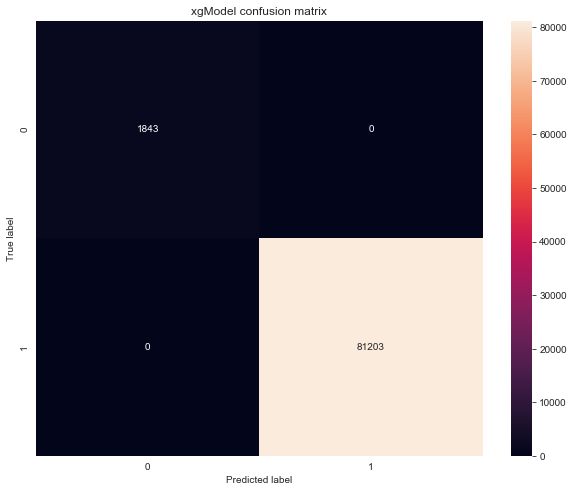

In [30]:
# create a confusion matrix
xgMatrix = confusion_matrix(responsTest, pred)
plt.figure(figsize=(10,8))
sns.heatmap(xgMatrix, annot=True, fmt="d")
plt.title("xgModel confusion matrix")
plt.ylabel("True label",)
plt.xlabel("Predicted label")
plt.show()

The numbers on the leading diagonal reveals that 1843 and 81203 are correctly classified by the xgboost model as delinquent and non-deliquent respectively.
On the otherhand, we have no incorrect classification. As shown in the confusion matrix, it gives more detailed explanation to the model performance than what accuracy score can offer.

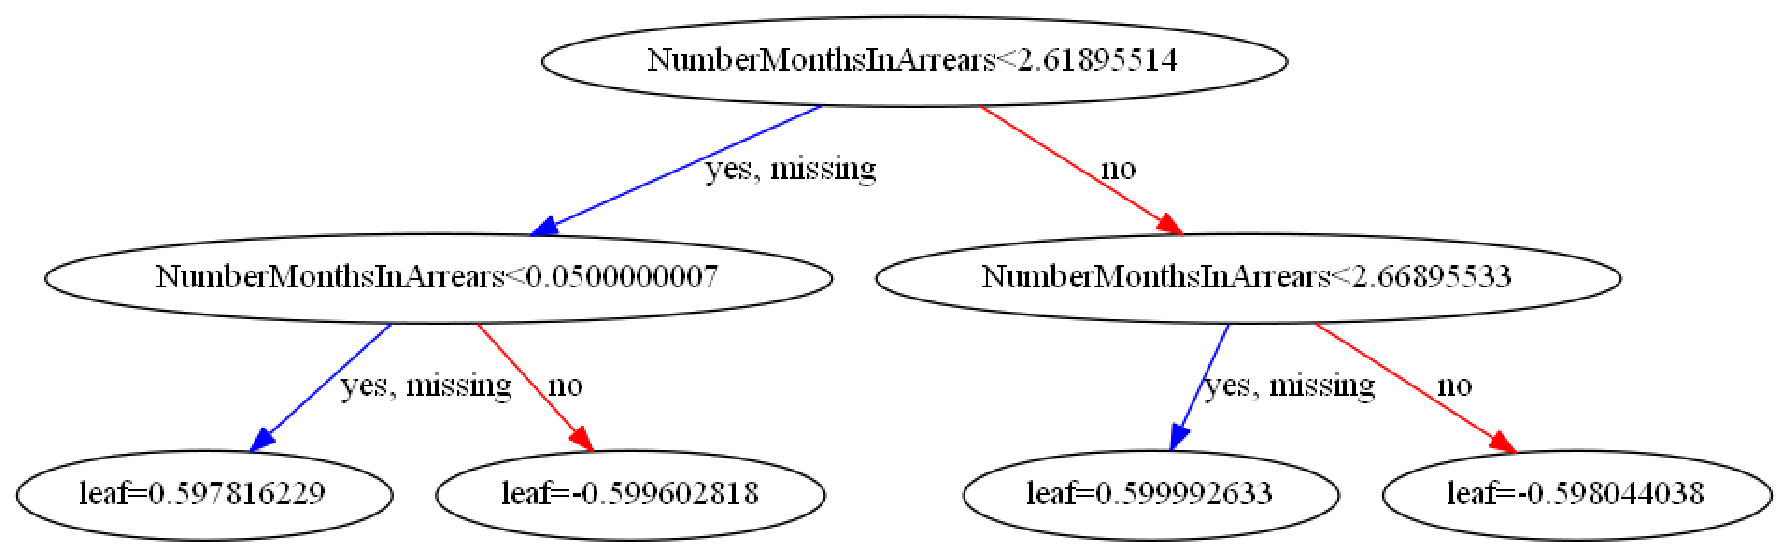

In [32]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plot_tree(xgModel,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

The plot provide insight into how the model arrived at the final decisions and what splits it made to arrive at those decisions.

In [33]:
from sklearn.metrics import classification_report
names = ["deliquent", "non-delinquent"]
print(classification_report(responsTest, pred,target_names=names))

                precision    recall  f1-score   support

     deliquent       1.00      1.00      1.00      1843
non-delinquent       1.00      1.00      1.00     81203

      accuracy                           1.00     83046
     macro avg       1.00      1.00      1.00     83046
  weighted avg       1.00      1.00      1.00     83046



### Random Forest Model Training

In [42]:
# import the model library 
from sklearn.ensemble import RandomForestClassifier

# create an intsance of the class
randomForestModel = RandomForestClassifier()

# trainnthe model on the training data 
randomForestModel.fit(featureTrain, responseTrain)

# check the prediction against the test set
rfPred = randomForestModel.predict(featureTest)

# check the accuracy 
randomForestAccuracy = accuracy_score(responsTest, preditions)
print("The accuracy of the random forest model is {}".format(randomForestAccuracy))

The accuracy of the random forest model is 1.0


### Random forest model evaluation

In [35]:
# check the training and validation metrics 
# check the training 
trainValidation = randomForestModel.predict_proba(featureTrain)[:,1]
fpr, tpr, thresholds = roc_curve(responseTrain, trainValidation)

# compute area under the curve
roc_auc = auc(fpr,tpr)

print("******************")
print(f"The training AUC is: {roc_auc}")


# check the validation
valValidation = randomForestModel.predict_proba(featureTest)[:,1]
fpr, tpr, thresholds = roc_curve(responsTest, valValidation)
# compute area under the curve
roc_auc = auc(fpr,tpr)

print("********************")
print(f"The validation AUC is: {roc_auc}")

******************
The training AUC is: 1.0
********************
The validation AUC is: 1.0


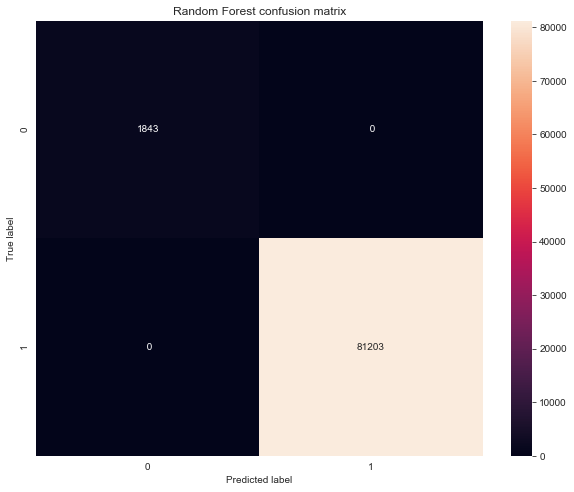

In [55]:
# create a confusion matrix
rF = confusion_matrix(responsTest, rfPred)
plt.figure(figsize=(10,8))
sns.heatmap(rF, annot=True, fmt="2g")
plt.title("Random Forest confusion matrix")
plt.ylabel("True label",)
plt.xlabel("Predicted label")
plt.show()

### Dealing imbalanced dataset
Imbalanced dataset is not so rare situation in handling real world scenarios. An imbalanced dataset is a dataset where the distribution of the classes are not uniform. A machine learning is not robust when it uses imbalanced dataset for training purpose. Therefore, a balanced dataset is preferred for training machine learning models. From the visualisation of our dataset, it is indicated that our dataset is not uniformly distributed. Hence, we have to handle this issue by implementing aynthetic minority oversampling technique (SMOTE).

In [65]:
from collections import Counter
from numpy import where
from imblearn.over_sampling import RandomOverSampler

print("Before resampling: ", Counter(response))
# define strategy technique
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply transform
featureResampled, responseResampled = oversample.fit_resample(feature, response)

# summarize the new class distribution
counter = Counter(responseResampled)
print("After resampling:", counter)

Before resampling:  Counter({1: 406125, 0: 9104})
After resampling: Counter({1: 406125, 0: 406125})


## Model selection with K-fold cross alidation

Now that the dataset is balanced, we would like to go with the following steps.

* To build more robust models with machine learning modeld, we should always perfrom k-fold cross validation

* We would be creating a new set of training and testing set from the resampled data 

* In this way, we would ensure the training set is used for both training and validating 

* Also, each fold would be used as testing

* we would inetgrate K-fold cross validation for random forest and xgboost

In [68]:
# split data 
predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(featureResampled, responseResampled, test_size = 0.25, random_state=0)

### Xgboost model

In [69]:
# fitting xgboost on the training model
xgbClassifier = xgb.XGBRFClassifier()
xgbClassifier.fit(predictorTrain, targetTrain)

[19:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [ ]:
# predicting the result
xgbPred = xgbClassifier.predict(predictorTest)

# making a confusion matrix
cm = confusion_matrix(targetTest, xgbPred)

# print out the confusion matrix
cm

# Applying k-fold cross validation
kfold = KFold(n_splits=10, random_state=7)
xgbAccuracy = cross_val_score(xgbClassifier, featureResampled, responseResampled, cv=kfold)


========Confusion Matrix=====confusion_matrix===
[[101549      0]
 [     0 101514]]


========Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101549
           1       1.00      1.00      1.00    101514

    accuracy                           1.00    203063
   macro avg       1.00      1.00      1.00    203063
weighted avg       1.00      1.00      1.00    203063



========AUC Scores=============
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


======Mean AUC Score===========
Mean AUC score for Random Forest is  1.0


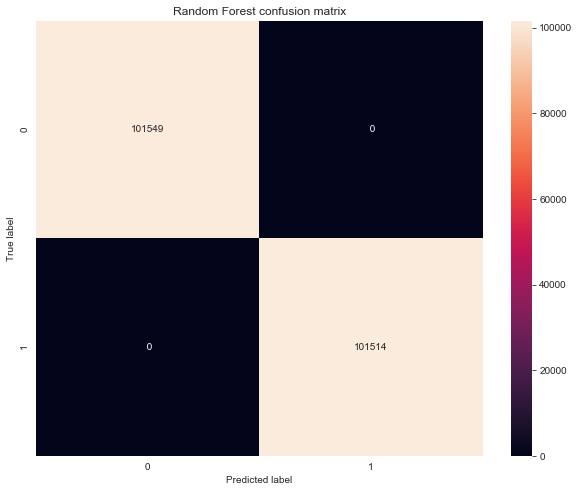

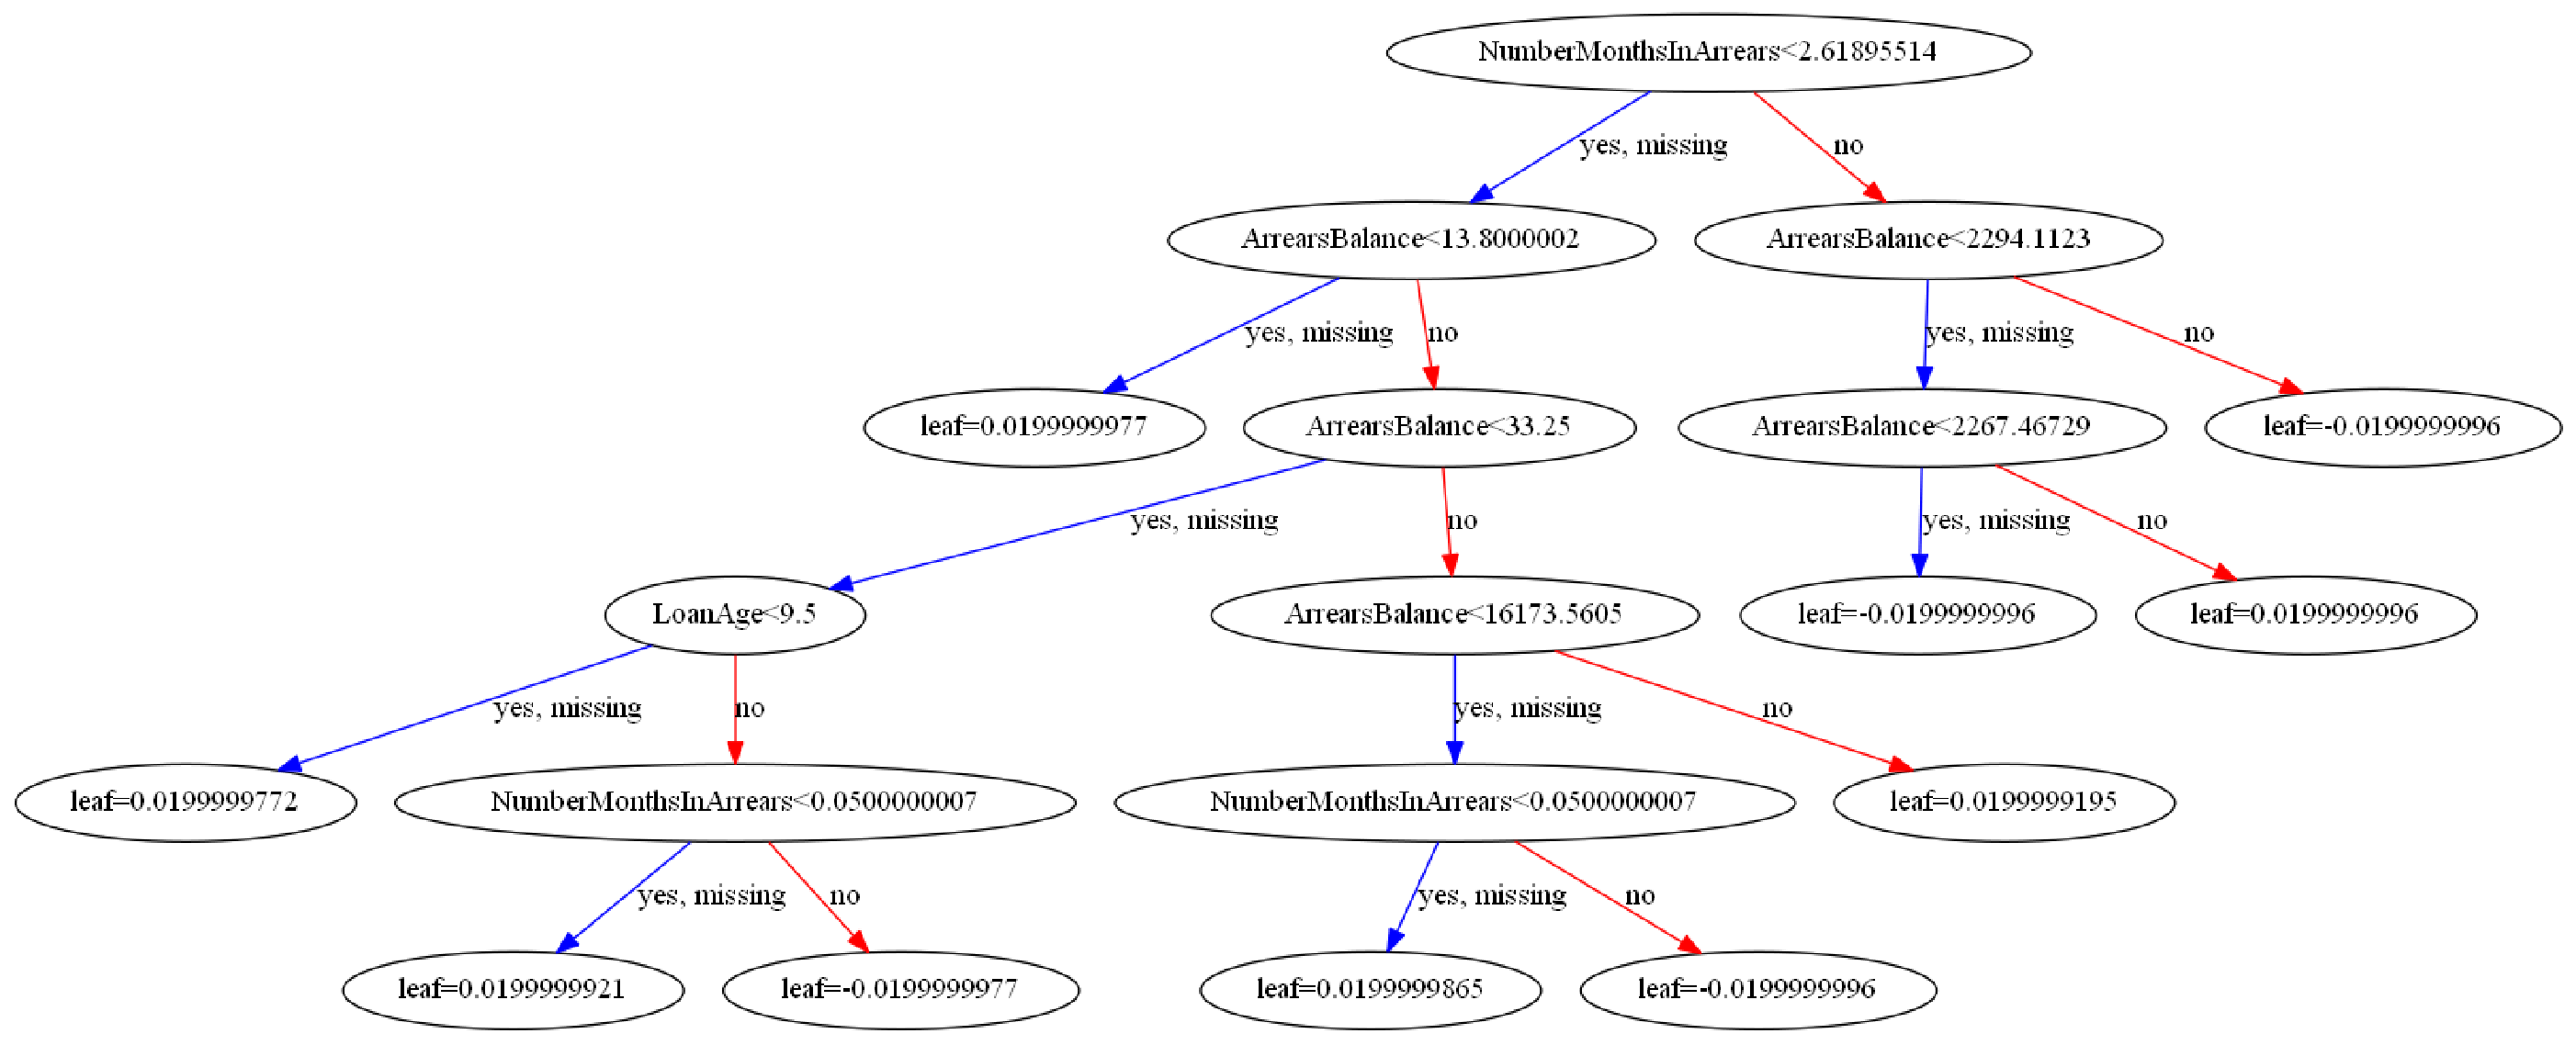

In [98]:
# print the result 
print("========Confusion Matrix=====confusion_matrix===")
print(confusion_matrix(targetTest, xgbPred))
print('\n')

print("========Classification Report=============")
print(classification_report(targetTest, xgbPred))
print('\n')


print("========AUC Scores=============")

print(xgbAccuracy)
print('\n')


print("======Mean AUC Score===========")
print("Mean AUC score for Random Forest is ", xgbAccuracy.mean())

#view the confusion matrix
rF = confusion_matrix(targetTest, xgbPred)
plt.figure(figsize=(10,8))
sns.heatmap(rF, annot=True, fmt="2g")
plt.title("Random Forest confusion matrix")
plt.ylabel("True label",)
plt.xlabel("Predicted label")
plt.show()


# view the tree

plot_tree(xgbClassifier,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

### Random forest model

In [91]:
clf = RandomForestClassifier(n_estimators=50, random_state=23, max_depth=5, class_weight = 'balanced')

In [93]:
# fiting random forest on the data
clf.fit(predictorTrain, targetTrain)
# predicitions
clfPredict = clf.predict(predictorTest)
# Applying k-fold cross validation
rfCvScore = cross_val_score(clf, featureResampled, responseResampled, scoring='roc_auc')

========Confusion Matrix=====confusion_matrix===
[[101549      0]
 [    67 101447]]


========Classification Report=============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101549
           1       1.00      1.00      1.00    101514

    accuracy                           1.00    203063
   macro avg       1.00      1.00      1.00    203063
weighted avg       1.00      1.00      1.00    203063



========AUC Scores=============
[0.99999945 0.99999999 0.99999995 1.         1.        ]


======Mean AUC Score===========
Mean AUC score for Random Forest is  0.9999998782569269


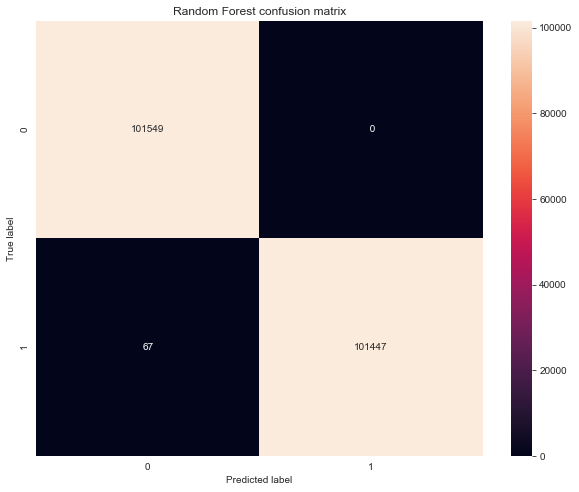

In [96]:
# print the result 
print("========Confusion Matrix=====confusion_matrix===")
print(confusion_matrix(targetTest, clfPredict))
print('\n')

print("========Classification Report=============")
print(classification_report(targetTest, clfPredict))
print('\n')


print("========AUC Scores=============")

print(rfCvScore)
print('\n')


print("======Mean AUC Score===========")
print("Mean AUC score for Random Forest is ", rfCvScore.mean())

rF = confusion_matrix(targetTest, clfPredict)
plt.figure(figsize=(10,8))
sns.heatmap(rF, annot=True, fmt="2g")
plt.title("Random Forest confusion matrix")
plt.ylabel("True label",)
plt.xlabel("Predicted label")
plt.show()

## Feature importance with xgboost model
A concept which helps to understand and identify the variables that are important for building any machine learning model. I will explore two different methods to identify the variables that have the most effect on the target variable

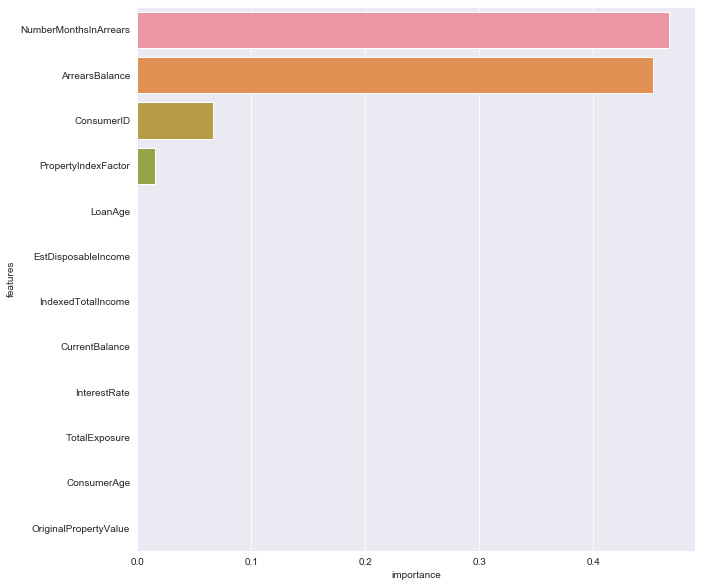

In [77]:
featuresImportanceData = pd.DataFrame()
featuresImportanceData['features'] = featureTrain.columns
featuresImportanceData["importance"] = xgbClassifier.feature_importances_

featuresImportanceData = featuresImportanceData.sort_values("importance", ascending=False).reset_index()
plt.figure(figsize=(10, 10))
sns.barplot("importance", "features", data=featuresImportanceData)

# Model Output Interpretation

### SHAP plot: Feature impact
This is a visualisation tool that produce outputs in a fancy way. This helps to explain a model by computing the contribution of each feature to the prediction. 

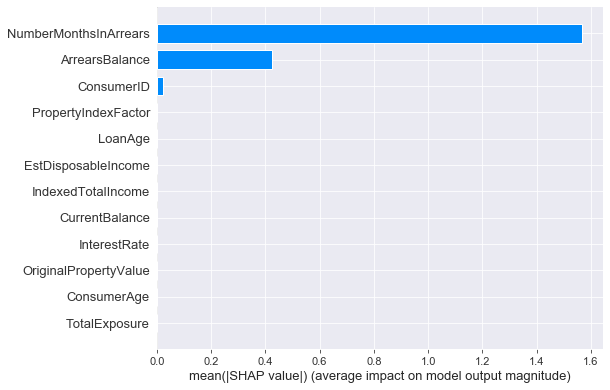

In [78]:
# explain the model prediction using shap
explainer = shap.Explainer(xgbClassifier)
shap_values = explainer(featureTest)

# visualise the feature importance 
shap.summary_plot(shap_values, featureTest, plot_type="bar")

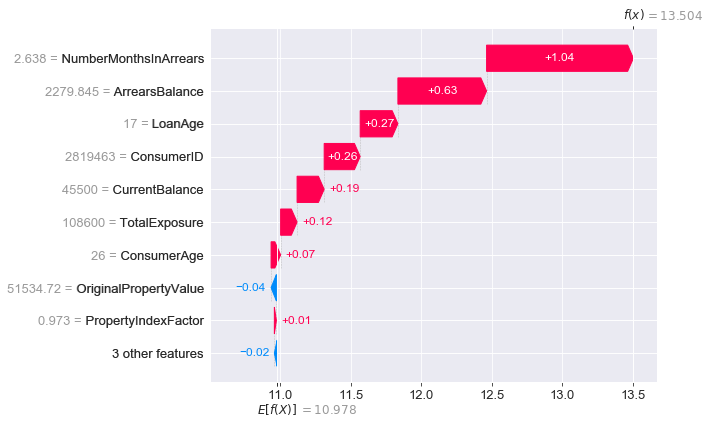

In [47]:
shap.plots.waterfall(shap_values[0])

#### Interpretation of SHAP Output

From the plot above, we can see that there are six features that are relevant for our model. Out of them, number of months in arrears happens to be the most important feature. 
1. colours shows whether that feature was high (RED colour) and low feature (Blue colour)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 

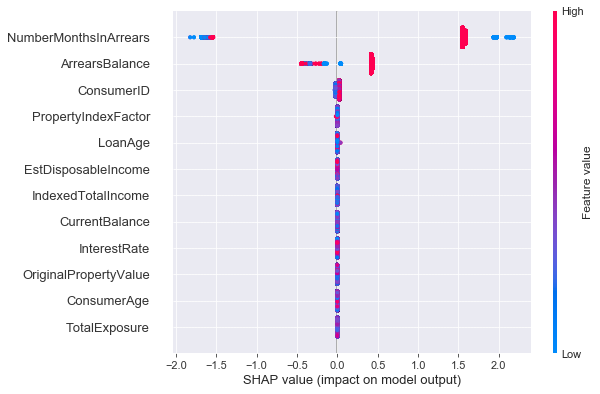

In [79]:
shap.summary_plot(shap_values, featureTest)

To get an overview of which features have the most contribution to the model, we can plot the shap values of each feature for every sample. The plot below show the shap values of each feature and how they impact the model. The colour represents feature value (High red) and (low blue). This tells us for example that a high value of NumberMonthsInArrears will lead to a mortgage being deliquent

## Partial dependency plots

Partial dependence plots show how a feature affects predictions(i.e increase or decrease). It shows the marginal effect of one or two features you have on predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature.

NumberMonthsInArrears, ArrearsBalance, and DebtID are the top variables on feature importance. so, let's see how these variables are related to each other.

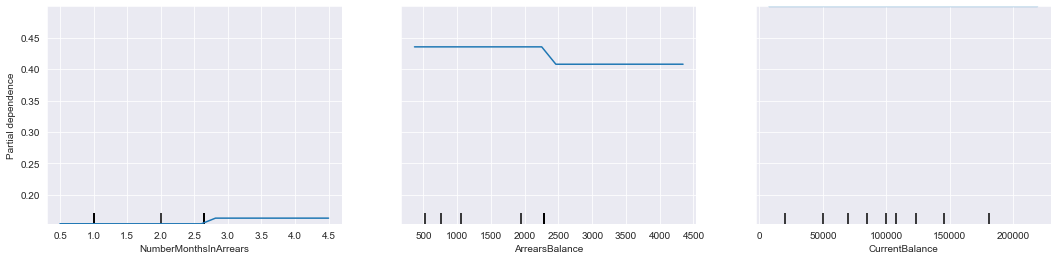

In [81]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(xgbClassifier, featureResampled, ["NumberMonthsInArrears", "ArrearsBalance", "CurrentBalance"], grid_resolution=20, ax=ax)

In [ ]:
# Mode to impute the categorical variable and median for the numerical variables
# def imputeMedianAndMode(data):
#     """
#     mean imputation for numerical variables
#     mode imputation for for categorical variable
#     """
#     numerical_cols = mortage_data._get_numeric_data().columns
#     categorical_cols = list(set(mortage_data.columns)-set(numerical_cols))
#     # get the dataframe column names
#     columns = list(data)
#     # iterate through the colums
#     for col in columns:
#         # transform to series
#         columnData = data[col]
#         # check to see if there is any missing value
#         missingData = sum(columnData.isna())
#         if missingData > 0:
#             # check for categorical columns 
#             if col in categorical_cols:
#                 catMode = columnData.mode()
#                 catMode = catMode.value_counts().index[0]
# #                 print("The categorical colums with the mode is ", col, catMode)
#                 columnData.fillna(catMode, inplace=True)
# #                 columnData.replace("NaN", catMode, inplace=True)
#                 # update the categorical column
#                 data[col] = columnData
#                 print("The imputed data", data)
# #             else:
# #                 # impute median for the missing numerical values
#                 colMedian = columnData.median()
#                 columnData.fillna(colMedian, inplace=True)
#                 data[col] = columnData
#         return data
# print(imputeMeanAndMode(mortage_data))

## Conclusion

In this analysis, we have seen how model perfomed when we have imbalanced data. We used accuracy to evaluate the model. No surprise that we achieved great accuracy for our model. To ensure we have a good model that will predict if a customer would default in mortgage payment, we needed to balance the dataset. Oversampling technique was used for the operation. By supporting K-fold cross validation with our models, we got good feedback. Hence, xgboost model gave us a workable accuracy so it outperformed random forest classifier. Furthermore, it gave us insight about the variables that will have most effect on the target we are trying to predict. The most important variable for this predict is number of month in arrears.